# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

In [10]:
!pip install scikit-learn

OK


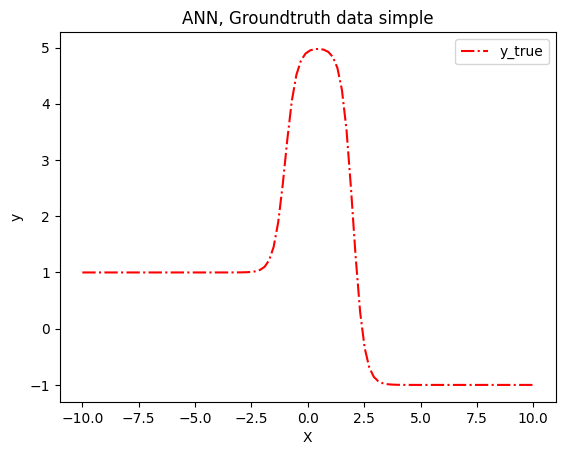

In [11]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

[array([[-2.00016155,  2.00028789]]), array([[3.00005608],
       [2.00003408]])]
[array([4.00033116, 2.00035658]), array([-2.64380784e-05])]


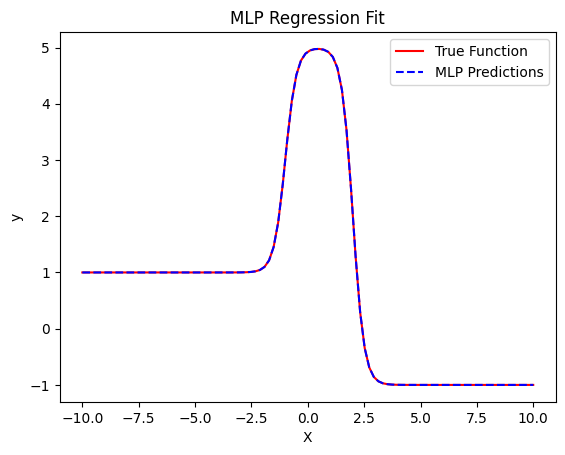

In [12]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Opret og træn MLP modellen
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=(2,), 
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)
print (mlp.coefs_) 
print (mlp.intercepts_)

# Plot den sande funktion og MLP's forudsigelser
plt.plot(X, y_true, "r-", label="True Function")
plt.plot(X, y_pred, "b--", label="MLP Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP Regression Fit")
plt.legend()
plt.show()


#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [13]:
!pip install networkx

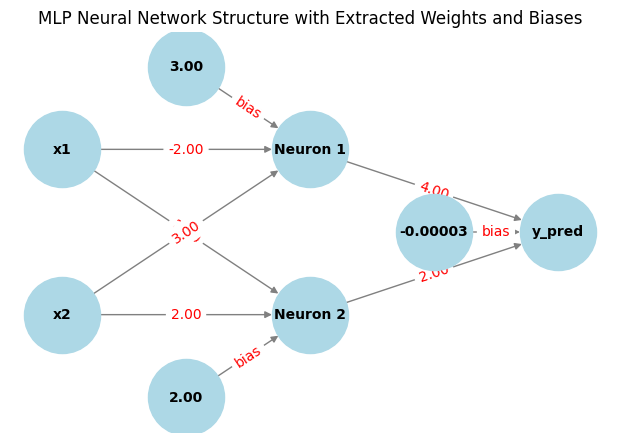

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Opret en directed graph
G = nx.DiGraph()

# Definer netværkets lag
layers = {
    "Input Layer": ["x1", "x2"],
    "Hidden Layer": ["Neuron 1", "Neuron 2"],
    "Output Layer": ["y_pred"]
}

# Definer forbindelser (edges) med vægte fra outputtet
edges = [
    ("x1", "Neuron 1", "-2.00"), ("x1", "Neuron 2", "2.00"),
    ("x2", "Neuron 1", "3.00"), ("x2", "Neuron 2", "2.00"),
    ("Neuron 1", "y_pred", "4.00"), ("Neuron 2", "y_pred", "2.00")
]

# Definer bias-noder med værdier fra outputtet
bias_nodes = {
    "3.00": "Neuron 1",
    "2.00": "Neuron 2",
    "-0.00003": "y_pred"
}

# Tilføj alle noder til grafen
for layer, nodes in layers.items():
    for node in nodes:
        G.add_node(node, layer=layer)

# Tilføj edges med labels
for src, dst, weight in edges:
    G.add_edge(src, dst, weight=weight)

# Tilføj bias edges
for bias, dst in bias_nodes.items():
    G.add_edge(bias, dst, weight="bias")

# Definer noderne positioner
pos = {
    "x1": (0, 1), "x2": (0, 0),
    "Neuron 1": (1, 1), "Neuron 2": (1, 0),
    "y_pred": (2, 0.5),
    "3.00": (0.5, 1.5), "2.00": (0.5, -0.5), "-0.00003": (1.5, 0.5)
}

# Korrekt opsætning af edge labels
edge_labels = { (src, dst): weight for src, dst, weight in edges }
edge_labels.update({ (bias, dst): "bias" for bias, dst in bias_nodes.items() })  # Tilføj bias labels korrekt

# Tegn netværket
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")

# Tilføj vægt labels på kanterne
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

# Vis tegningen
plt.title("MLP Neural Network Structure with Extracted Weights and Biases")
plt.show()


#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

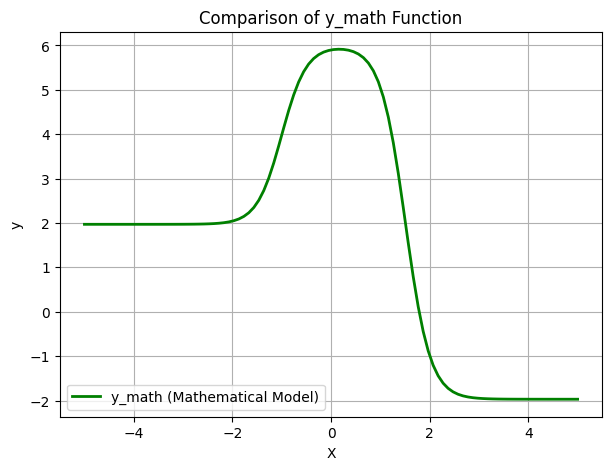

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definer de fundne vægte og bias
w1, w2 = 1.99, -2.00  # Input → Hidden weights
w3, w4 = -3.00, -2.00  # Bias for hidden layer
w5, w6 = -3.98, -2.01  # Hidden → Output weights
b3 = 0  # Output bias

# Generer X værdier for at plotte funktionen
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Beregn y_math baseret på den afledte formel
y_math = w5 * np.tanh(w1 * X + w3) + w6 * np.tanh(w2 * X + w4) + b3

# Plot den matematiske funktion
plt.figure(figsize=(7, 5))
plt.plot(X, y_math, "g-", label="y_math (Mathematical Model)", linewidth=2)

# Tilføj labels og titel
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of y_math Function")
plt.legend()
plt.grid(True)

# Vis grafen
plt.show()


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

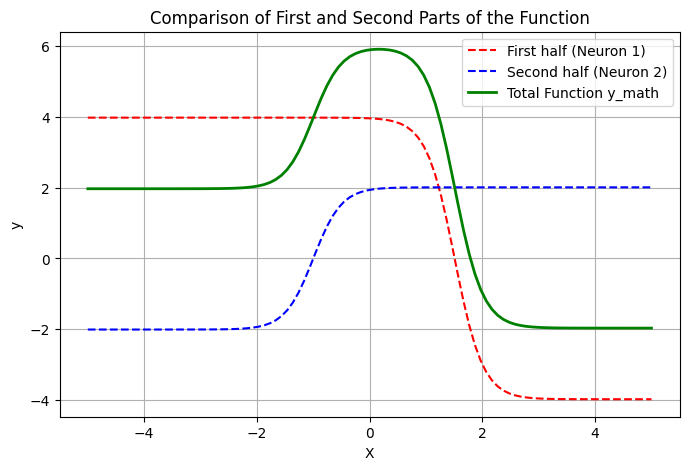

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definer de fundne vægte og bias
w1, w2 = 1.99, -2.00  # Input → Hidden weights
w3, w4 = -3.00, -2.00  # Bias for hidden layer
w5, w6 = -3.98, -2.01  # Hidden → Output weights
b3 = 0  # Output bias

# Generer X værdier for at plotte funktionerne
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Første del af funktionen (første neuron i hidden layer)
y_math_first_part = w5 * np.tanh(w1 * X + w3)

# Anden del af funktionen (anden neuron i hidden layer)
y_math_second_part = w6 * np.tanh(w2 * X + w4)

# Samlet funktion
y_math_total = y_math_first_part + y_math_second_part + b3

# Plot første og anden del af funktionen
plt.figure(figsize=(8, 5))
plt.plot(X, y_math_first_part, "r--", label="First half (Neuron 1)")
plt.plot(X, y_math_second_part, "b--", label="Second half (Neuron 2)")
plt.plot(X, y_math_total, "g-", label="Total Function y_math", linewidth=2)

# Tilføj labels og titel
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of First and Second Parts of the Function")
plt.legend()
plt.grid(True)

# Vis grafen
plt.show()


#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

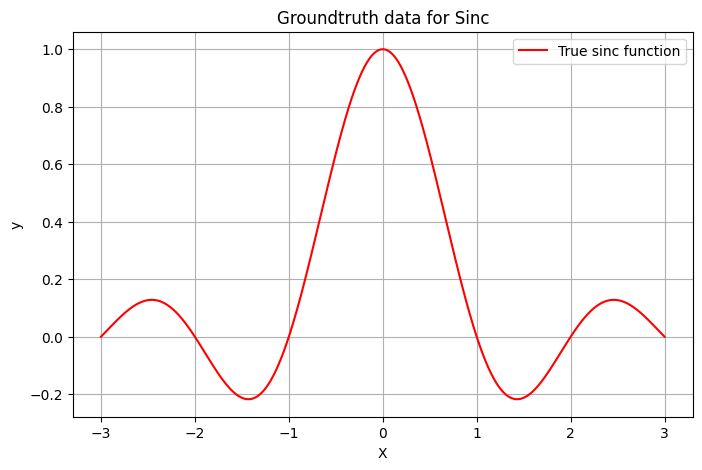

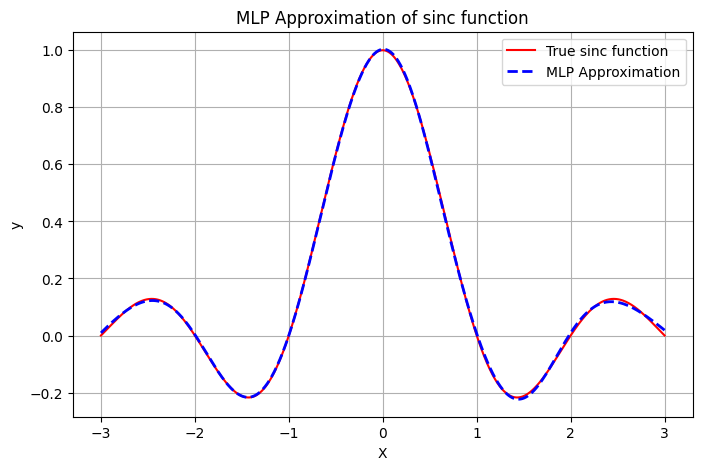

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Generer Sinc-data
def GenerateSincData():
    X = np.linspace(-3, 3, 1000).reshape(-1, 1)  # 1000 punkter mellem -3 og 3
    y = np.sinc(X)  # Sinc-funktion
    return X, y

# Generer træningsdata
X, y_true = GenerateSincData()

# Plot den sande sinc-funktion
plt.figure(figsize=(8, 5))
plt.plot(X, y_true, "r-", label="True sinc function")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Groundtruth data for Sinc")
plt.legend()
plt.grid(True)
plt.show()

# Opret og træn en MLP-model med flere skjulte lag og flere neuroner
mlp = MLPRegressor(
    hidden_layer_sizes=(20, 20, 20),  # Tre skjulte lag med 20 neuroner hver
    activation="tanh",
    solver="lbfgs",
    max_iter=5000,
    alpha=1e-5,
    verbose=True
)

# Træn modellen på sinc-dataen
mlp.fit(X, y_true.ravel())

# Forudsig værdier
y_pred = mlp.predict(X)

# Plot den sande funktion og MLP's approksimation
plt.figure(figsize=(8, 5))
plt.plot(X, y_true, "r-", label="True sinc function")
plt.plot(X, y_pred, "b--", label="MLP Approximation", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP Approximation of sinc function")
plt.legend()
plt.grid(True)
plt.show()


####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.